# Udacity MLND capstone: [dogs vs cats](https://github.com/nd009/capstone/tree/master/dog_vs_cat)

## <font color=blue>Pre-processing</font>

Bin zhu @ 04.05.2018

使用深度学习方法识别一张图片是猫还是狗。

- 输入：一张彩色图片
- 输出：是猫还是狗
- 可选输出：猫狗面部坐标，猫狗身体mask

### 1、探索数据

先查看一下**数据的目录**

In [1]:
import os
import random
import numpy as np
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

train_path = 'data/train/train/'
test_path = 'data/test/test/'
train_list = os.listdir(train_path)
test_list = os.listdir(test_path)

print(train_list[:100], '\n'*5, test_list[:100])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10047.jpg', 'cat.10048.jpg', 'cat.10049.jpg', 'cat.1005.jpg'

可以看到训练集的图片的标签是以图片命名给出的，下面分别统计**各类别数目**

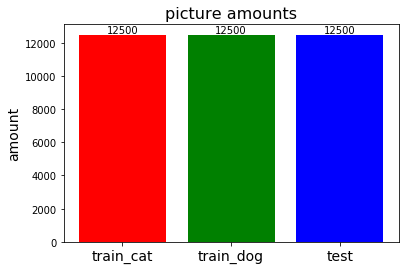

In [2]:
cat_num = 0
dog_num = 0
test_num = len(test_list)

for i in train_list:
    if i[:3] == 'cat':
        cat_num += 1
    if i[:3] == 'dog':
        dog_num += 1

name_list = ['train_cat', 'train_dog', 'test']  
num_list = [cat_num, dog_num, test_num]

# 绘制直方图
rects=plt.bar(range(3), num_list, color='rgb')  
for rect in rects: 
    height = rect.get_height() 
    plt.text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom')
plt.xticks(range(3), name_list, size=14)
plt.ylabel('amount', size=14)
plt.title('picture amounts', size=16)
plt.show()

随机查看训练集和测试集中图片，并查看**图片大小和模式**

random train picture: cat.7959.jpg
size: (499, 375)
mode: RGB


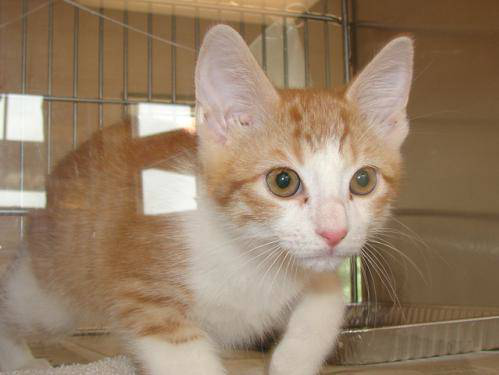



random test picture: 878.jpg
size: (275, 138)
mode: RGB


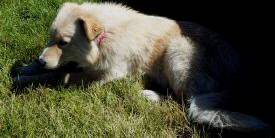

In [3]:
random_train = random.randint(0, len(train_list))
random_test = random.randint(0, len(test_list))

img_train = Image.open(train_path + train_list[random_train])
img_test = Image.open(test_path + test_list[random_test])

print('random train picture: {}\nsize: {}\nmode: {}'.format(train_list[random_train], 
                                                            img_train.size, img_train.mode))
display(img_train)
print('\n\nrandom test picture: {}\nsize: {}\nmode: {}'.format(test_list[random_test], 
                                                               img_test.size, img_test.mode))
display(img_test)